In [16]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [33]:
pd.set_option('display.max_row', 111)
pd.set_option('display.max_column', 8)

## Reading and Visualization of data

In [53]:
data = pd.read_csv('data.csv')

In [54]:
data.columns = ['Nitrogen', 'Phosphorus', 'Potassium', 'temperature', 'humidity', 'ph', 'rainfall', 'label']
features = data.drop('label', axis = 1)
target = data['label']

In [55]:
data.head()

,Nitrogen,Phosphorus,Potassuim,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [56]:
print('Number of rows: ', data.shape[0])

Number of rows:  2200


In [57]:
print('Number of features: ', data.shape[1])

Number of features:  8


In [58]:
#Data types in the dataset
data.dtypes

Nitrogen         int64
Phosphorus       int64
Potassuim        int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [49]:
data.describe()

,Nitrogen,Phosphorus,Potassuim,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


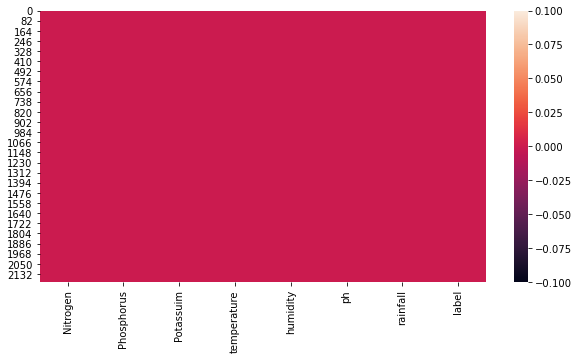

In [59]:
#Visualization of missing values
plt.figure(figsize=(10,5))
sns.heatmap(data.isna())

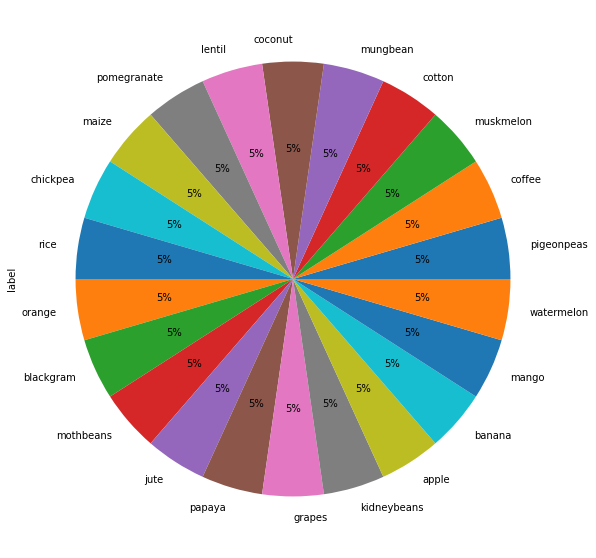

In [60]:
#Labels values
fig = plt.figure(figsize = (10, 10))
fig.patch.set_facecolor('white')
target.value_counts().plot(kind = 'pie', autopct='%.0f%%')

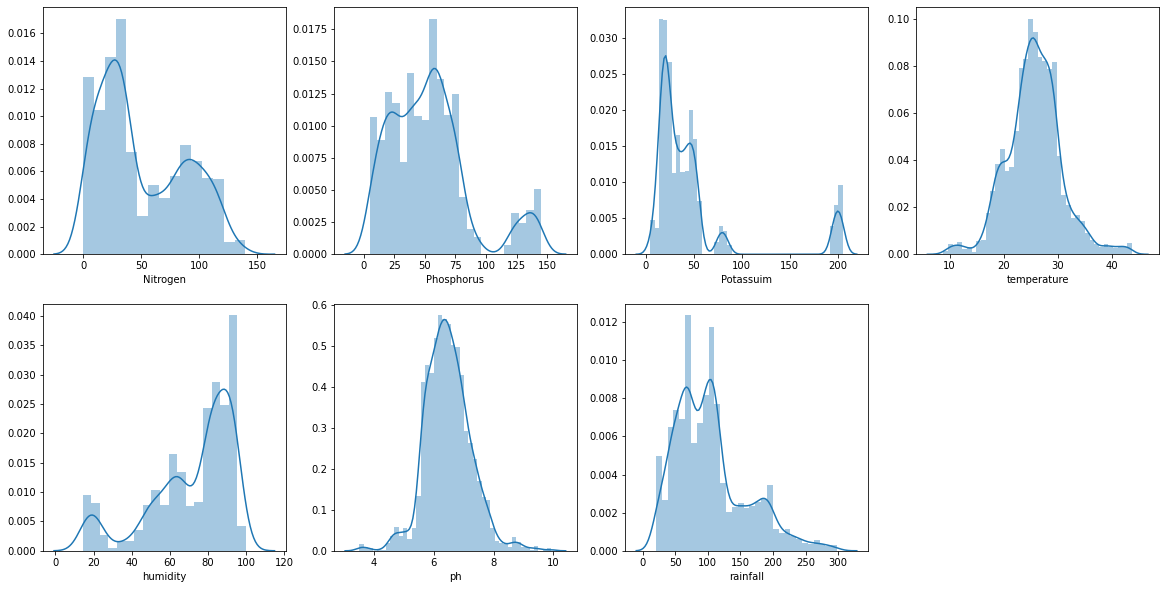

In [73]:
#Data Distribution
plt.figure(figsize=(20,10))
i = 1
for col in features.columns:
    plt.subplot(2, 4, i)
    sns.distplot(data[col])
    i = i+1

## Clustering 

In [74]:
from sklearn.cluster import KMeans

In [101]:
inertia_list = []
for n_clusters in range(1,21):
    model = KMeans(n_clusters = n_clusters, init = 'k-means++', random_state = 0)
    model.fit(features)
    inertia_list.append(model.inertia_)

Text(0, 0.5, 'Inertia values')

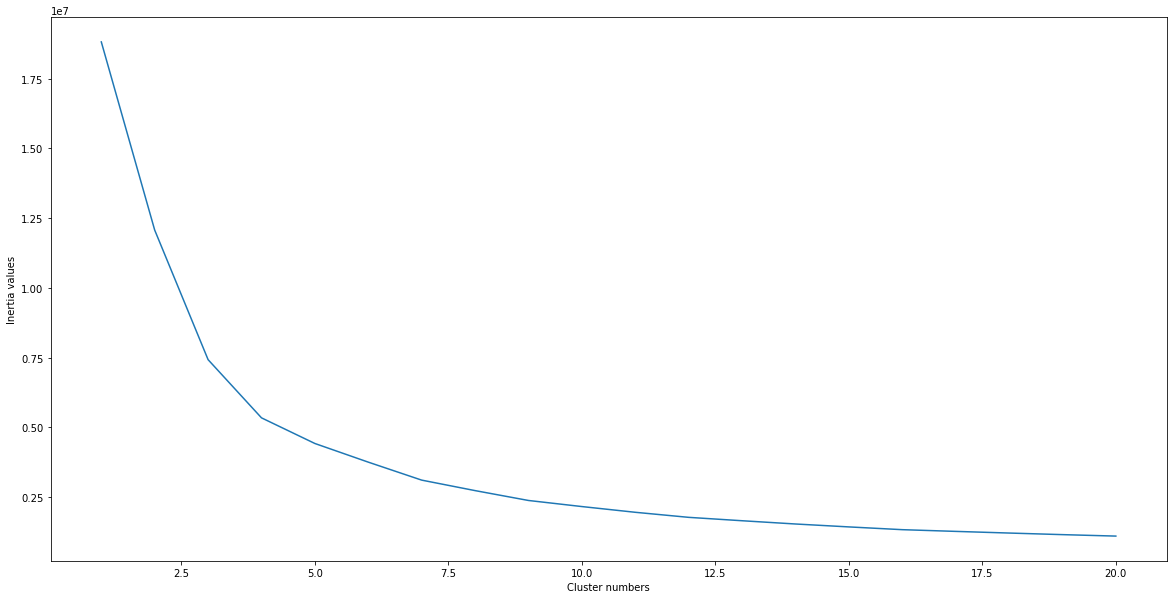

In [102]:
plt.figure(figsize = (20, 10))
plt.plot(range(1, 21),inertia_list)
plt.xlabel('Cluster numbers')
plt.ylabel('Inertia values')

## Best Model

In [126]:
final_model = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0)
final_model.fit(features)
predictions = final_model.predict(features)

In [127]:
predictions = pd.DataFrame(predictions)

In [128]:
predictions = pd.concat([predictions, target], axis = 1)

In [129]:
predictions = predictions.rename(columns = {0: 'clusters'})

In [134]:
def results():
    print('Cluster 1: ', predictions[predictions['clusters'] == 0]['label'].unique())
    print('Cluster 2: ', predictions[predictions['clusters'] == 1]['label'].unique())
    print('Cluster 3: ', predictions[predictions['clusters'] == 2]['label'].unique())
    print('Cluster 4: ', predictions[predictions['clusters'] == 3]['label'].unique())

In [135]:
results()

Cluster 1:  ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']
Cluster 2:  ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
Cluster 3:  ['grapes' 'apple']
Cluster 4:  ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
